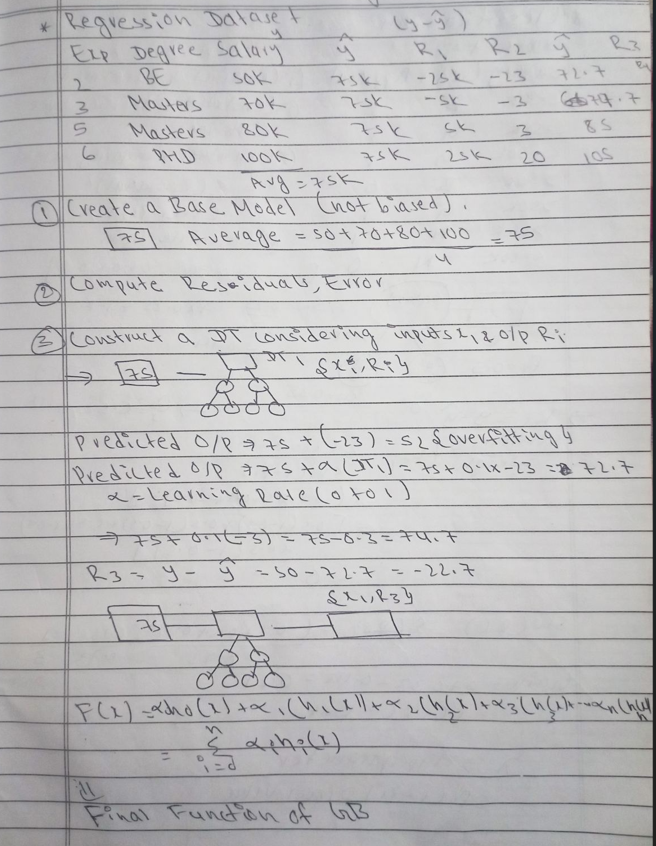

In [ ]:
print(75-0.1*23)
print(75-0.1*3)
print(75+0.1*3)
print(75+0.1*20)

72.7
74.7
75.3
77.0


Used Car Price Prediction

1. Problem Statement
- This dataset comprises used cars sold on cardekho.com in India as well as important features of these cars.
- User can predict the price of the car based on input features.
- Prediction results can be used to give new seller the price suggestion based on market condition.

2. Data collection
- Dataset is collected from scraping from cardekho website.
- The data consists of 13 columns and 15411 rows.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('cardekho.csv', index_col=0)
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### Feature Engineering

#### Data Cleaning
- Handling Missing Values
- Handling Duplicates
- Check data type
- Understand the dataset

In [ ]:
# Check null values
# Check features with nan value
df.isnull().sum()

,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0


In [ ]:
df.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


In [ ]:
## Remove unnecessary columns
df.drop('car_name', axis=1, inplace=True)
df.drop('brand', axis=1, inplace=True)

In [ ]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [ ]:
# Getting all different types of features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features: ', len(num_features))

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical features: ', len(cat_features))

discrete_features = [feature for feature in num_features if len(df[feature].unique()) < 25]
print('Number of discrete features: ', len(discrete_features))

continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Number of continuous features: ', len(continuous_features))

Number of numerical features:  7
Number of categorical features:  4
Number of discrete features:  2
Number of continuous features:  5


In [ ]:
## Independent and dependent features
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [ ]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [ ]:
y.head()

,selling_price
0,120000
1,550000
2,215000
3,226000
4,570000


##### **Feature Encoding and Scaling**
**One Hot Encoding for Columns which had lesser unique values and not ordinal**
- One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [ ]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [ ]:
df['model'].value_counts()

,count
model,
i20,906
Swift Dzire,890
Swift,781
Alto,778
City,757
...,...
Altroz,1
C,1
Ghost,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['model'] = le.fit_transform(X['model'])

In [ ]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [ ]:
len(df['seller_type'].unique()), len(df['fuel_type'].unique()), len(df['transmission_type'].unique())

(3, 5, 2)

In [ ]:
# Create ColumnTransformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
onehot_columns = ['seller_type', 'fuel_type', 'transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, onehot_columns),
        ('StandardScaler', numeric_transformer, num_features)
    ], remainder='passthrough'
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -1.32425883,
        -1.26335238, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.55471774,
        -0.43257082, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.55471774,
        -0.47911321, -0.40302241],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.02291783,
         0.06822523, -0.40302241],
       [ 0.        ,  0.        ,  1.        , ...,  1.32979434,
         0.91715831,  2.07344426],
       [ 0.        ,  0.        ,  0.        , ...,  0.02099878,
         0.39588361, -0.40302241]])

In [ ]:
pd.DataFrame(X).shape

(15411, 14)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,1.247335,-0.000276,-1.324259,-1.263352,-0.403022
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.225693,-0.343933,-0.690016,-0.192071,-0.554718,-0.432571,-0.403022
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.536377,1.647309,0.084924,-0.647583,-0.554718,-0.479113,-0.403022
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,-0.360667,0.292211,-0.936610,-0.779312,-0.403022
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.666211,-0.012060,-0.496281,0.735736,0.022918,-0.046502,-0.403022


In [ ]:
# Separa dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((12328, 14), (3083, 14))

In [ ]:
X_train

array([[ 0.        ,  0.        ,  1.        , ...,  1.75390551,
         2.66249771, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.55087963,
        -0.38602844, -0.40302241],
       [ 0.        ,  0.        ,  1.        , ...,  0.89033072,
         3.27453006, -0.40302241],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.9366097 ,
        -0.78070786, -0.40302241],
       [ 0.        ,  0.        ,  0.        , ..., -0.55471774,
        -0.43582879, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.04616815,
         0.06194201, -0.40302241]])

In [ ]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -0.55471774,
        -0.50471152, -0.40302241],
       [ 1.        ,  0.        ,  1.        , ..., -0.45684593,
        -0.61874036, -0.40302241],
       [ 0.        ,  0.        ,  1.        , ..., -0.45684593,
        -0.27525757,  2.07344426],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.55087963,
        -0.27665384, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.9366097 ,
        -0.78070786, -0.40302241],
       [ 0.        ,  0.        ,  1.        , ..., -0.17282578,
        -0.2759557 , -0.40302241]])

Model Training and Model Selection

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
## Create a function to evaluate the model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
## Beginning of model training

models = {
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'DecisionTreeRegressor' : DecisionTreeRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    mae_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
    mae_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

    print(f'Model: {list(models.keys())[i]}')

    print("Model Performance on Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))

    print("-----------------------------------")

    print("Model Performance on Testing Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))

    print('='*35)
    print('\n')

Model: GradientBoostingRegressor
Model Performance on Training Set
- Root Mean Squared Error: 204944.5104
- Mean Absolute Error: 111709.5558
- R2 Score: 0.9482
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 256543.9063
- Mean Absolute Error: 126580.8956
- R2 Score: 0.9126


Model: DecisionTreeRegressor
Model Performance on Training Set
- Root Mean Squared Error: 20797.2352
- Mean Absolute Error: 5164.8199
- R2 Score: 0.9995
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 300868.0987
- Mean Absolute Error: 123419.0913
- R2 Score: 0.8798




In [ ]:
 # Inilialize few parameters for hyperparameter tuning
gb_params = {
    'loss' : ['squared_error', 'huber', 'absolute_error'],
    'criterion' : ['friedman_mse', 'mse', 'squared_error'],
    'min_samples_split' : [2, 8, 15, 20],
    'n_estimators' : [50, 100, 150, 200, 250],
    'max_depth' : [3, 5, 8, 10, None],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3]
}

In [ ]:
# Models list for hyperparameter tuning
randomcv_models = [
    ('GradientBoostingRegressor', GradientBoostingRegressor(), gb_params)
]

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

model_params = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params, n_iter=10,n_jobs=-1)
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"---------------------Best Parameters for {model_name}---------------------")
    print(model_params[model_name])

---------------------Best Parameters for GradientBoostingRegressor---------------------
{'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 3, 'loss': 'squared_error', 'learning_rate': 0.05, 'criterion': 'friedman_mse'}


In [ ]:
## Retrain the models with best parameters

models = {
    'GradientBoostingRegressor' : GradientBoostingRegressor(n_estimators=250, min_samples_split=2, max_depth=None, loss='absolute_error', learning_rate=0.05, criterion='friedman_mse')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    mae_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
    mae_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

    print(f'Model: {list(models.keys())[i]}')

    print("Model Performance on Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))

    print("-----------------------------------")

    print("Model Performance on Testing Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))

    print('='*35)
    print('\n')

Model: GradientBoostingRegressor
Model Performance on Training Set
- Root Mean Squared Error: 70525.1267
- Mean Absolute Error: 6511.7104
- R2 Score: 0.9939
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 237787.9026
- Mean Absolute Error: 101752.9394
- R2 Score: 0.9249


